In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df=pd.read_csv('./gender_classification.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# Encoding

In [ ]:
#convert categorical column into numeric
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])   # Male --> 1 , Female --> 0

# Data Splitting

In [ ]:
x=df.drop("gender",axis=1)
y=df["gender"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test.shape

(1001, 7)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_std=StandardScaler().fit_transform(x_train)
x_test_std=StandardScaler().fit_transform(x_test)

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df['gender'].value_counts()

,count
gender,
0,2501
1,2500


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:

print("accuracy score:",np.round(accuracy_score(y_test,y_pred),2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.96
confusion matrix:
 [[485  17]
 [ 23 476]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

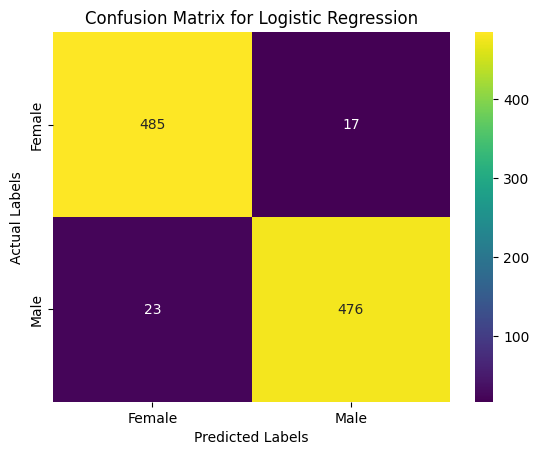

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="viridis",xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression')

# 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
model_dt.fit(x_train_std,y_train)

y_pred=model_dt.predict(x_test_std)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.9530469530469531
confusion matrix:
 [[480  22]
 [ 25 474]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       502
           1       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



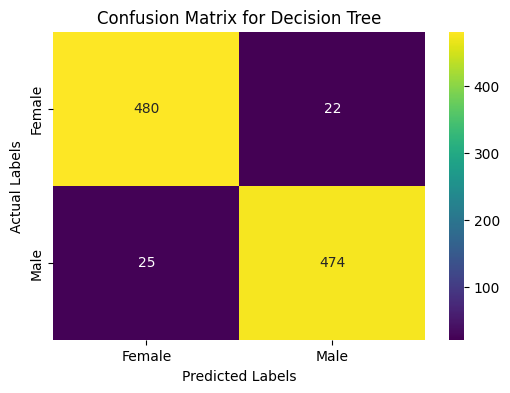

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="viridis",xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

**Decision** **Tree** **Plot**

In [ ]:
from sklearn.tree import plot_tree

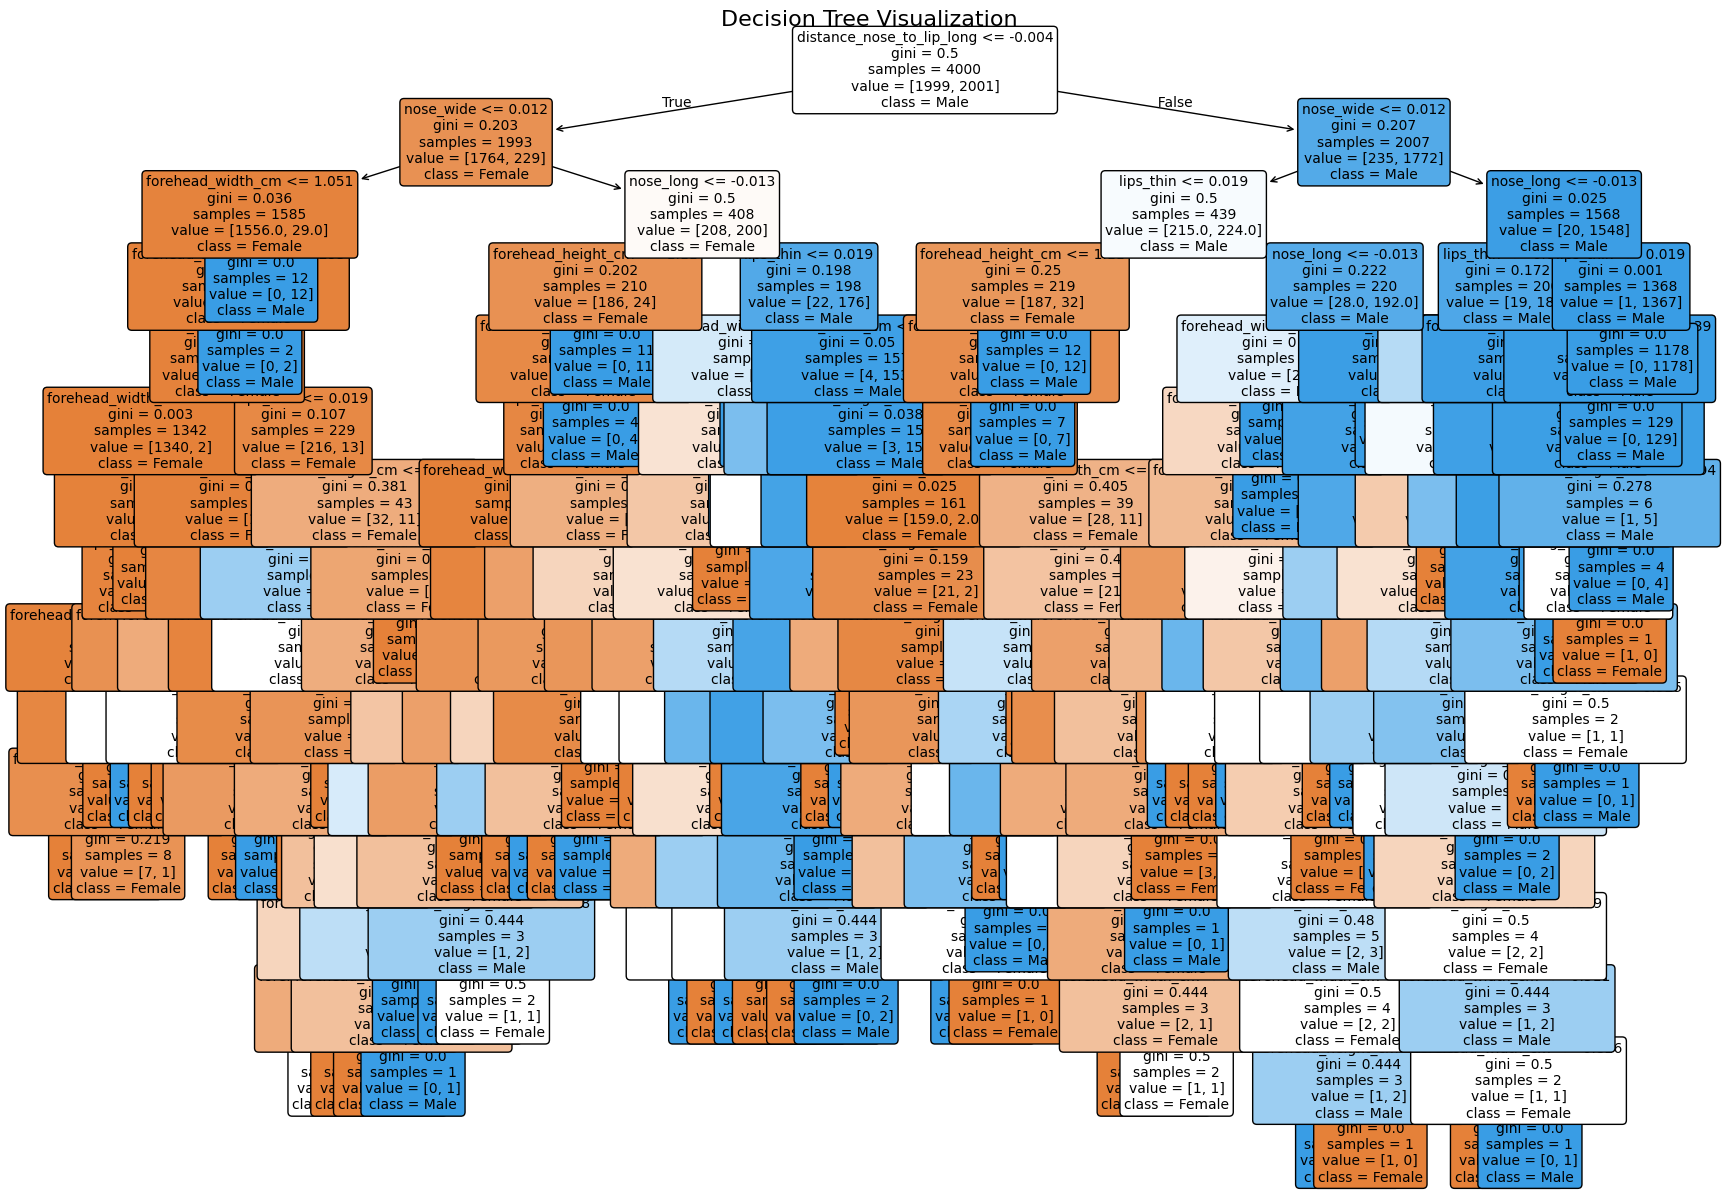

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(
    model_dt,
    feature_names=[str(col) for col in x.columns],
    class_names=[str(c) for c in le.classes_],
    filled=True,
    rounded=True,
    fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# 3. KNN - K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Elbow method

In [ ]:
error_rate =[]
k_range = range(1,21)

for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(x_train_std,y_train)
  y_pred_k = model_knn.predict(x_test_std)
  error = 1- accuracy_score(y_test,y_pred_k)
  error_rate.append(error)

In [ ]:
print(error_rate)

[0.04895104895104896, 0.04395604395604391, 0.03996003996003994, 0.042957042957042946, 0.040959040959040904, 0.03996003996003994, 0.03596403596403597, 0.03696303696303693, 0.03596403596403597, 0.03696303696303693, 0.03696303696303693, 0.03596403596403597, 0.03296703296703296, 0.034965034965035, 0.033966033966033926, 0.03596403596403597, 0.034965034965035, 0.034965034965035, 0.034965034965035, 0.03296703296703296]


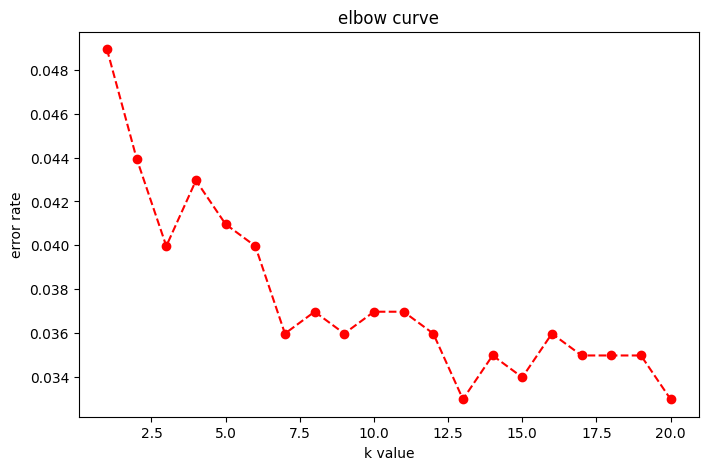

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_range,error_rate,marker="o",linestyle="--",color="r")
plt.xlabel("k value")
plt.ylabel("error rate")
plt.title("elbow curve")
plt.show()

In [ ]:
#finding k value from elbow curve
optimal_k_value=error_rate.index(min(error_rate))+1
optimal_k_value

13

In [ ]:
#model building with new k value

model_knn_1=KNeighborsClassifier(n_neighbors=optimal_k_value)
model_knn_1.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred=model_knn_1.predict(x_test_std)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.967032967032967
confusion matrix:
 [[494   8]
 [ 25 474]]
classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       502
           1       0.98      0.95      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



Text(50.722222222222214, 0.5, 'True label')

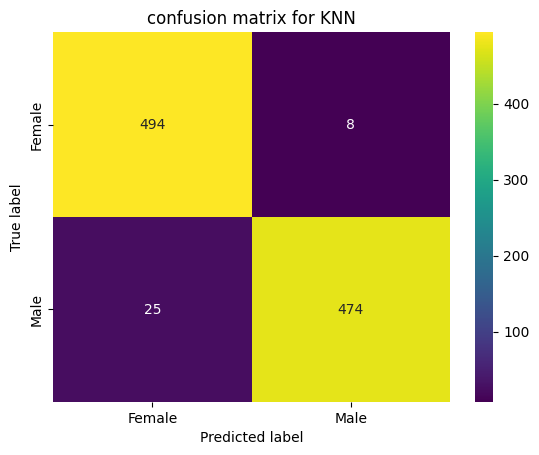

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="viridis",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for KNN")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 4. SVM - Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
kernels = ["linear","poly","rbf","sigmoid"]

for kernel in kernels:
  print(f"svm -{kernel}")
  if kernel == "poly":
    model_svm= SVC(kernel = kernel,degree=2)
  else:
    model_svm= SVC(kernel = kernel)

  # train the model
  model_svm.fit(x_train_std,y_train)

  # model prediction
  y_pred = model_svm.predict(x_test_std)

  # Evaluation metrics
  print("accuracy:",np.round(accuracy_score(y_test,y_pred),2))
  print("confusion_matix:\n",confusion_matrix(y_test,y_pred))
  print("classification_report:\n",classification_report(y_test,y_pred))

svm -linear
accuracy: 0.96
confusion_matix:
 [[484  18]
 [ 22 477]]
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       502
           1       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

svm -poly
accuracy: 0.67
confusion_matix:
 [[396 106]
 [223 276]]
classification_report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       502
           1       0.72      0.55      0.63       499

    accuracy                           0.67      1001
   macro avg       0.68      0.67      0.67      1001
weighted avg       0.68      0.67      0.67      1001

svm -rbf
accuracy: 0.97
confusion_matix:
 [[492  10]
 [ 24 475]]
classification_report:
               precision    recall  f1-score   support

           0       0

Text(50.722222222222214, 0.5, 'True label')

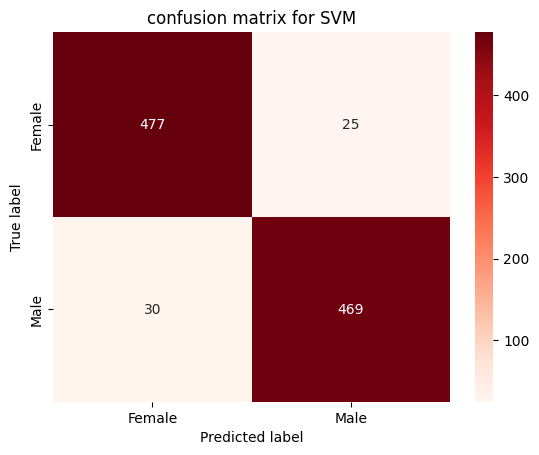

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Reds",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB=GaussianNB()
model_NB.fit(x_train_std,y_train)

GaussianNB()

In [ ]:
y_pred=model_NB.predict(x_test_std)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print("accuracy score:",np.round(accuracy_score(y_test,y_pred),2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.96
confusion matrix:
 [[487  15]
 [ 21 478]]
classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Text(50.722222222222214, 0.5, 'True label')

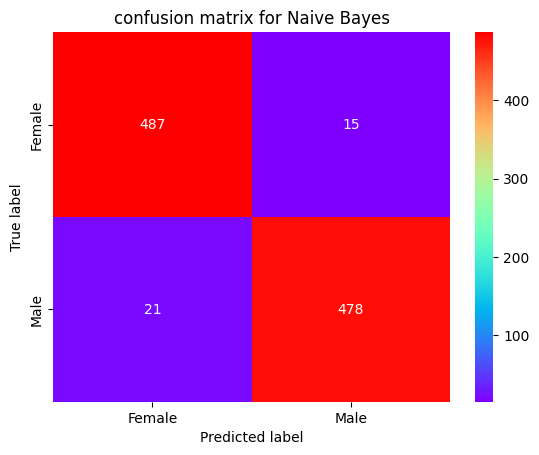

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="rainbow",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for Naive Bayes")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    random_state=42
)

model_rf.fit(x_train_std,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.7812187812187812
confusion matrix:
 [[500   2]
 [217 282]]
classification report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       502
           1       0.99      0.57      0.72       499

    accuracy                           0.78      1001
   macro avg       0.85      0.78      0.77      1001
weighted avg       0.84      0.78      0.77      1001



Text(50.722222222222214, 0.5, 'True label')

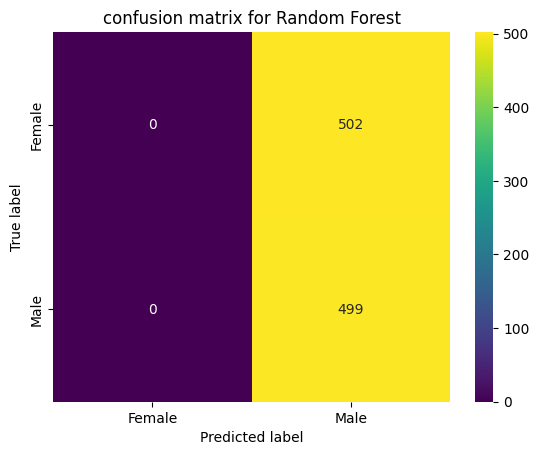

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="viridis",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for Random Forest")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 7. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_AB = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

model_AB.fit(x_train_std,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred=model_AB.predict(x_test_std)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.964035964035964
confusion matrix:
 [[487  15]
 [ 21 478]]
classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



Text(50.722222222222214, 0.5, 'True label')

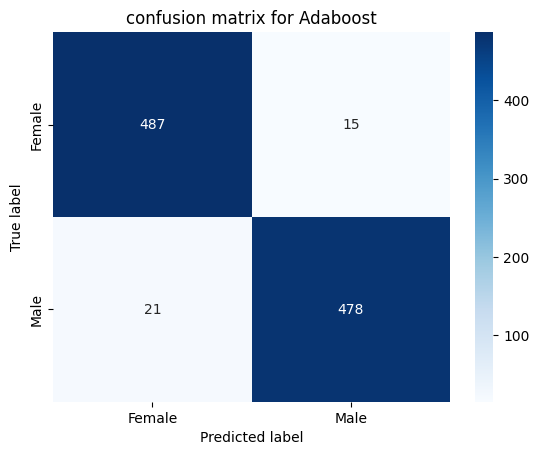

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for Adaboost")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 8. Xg Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(n_estimators=100,random_state=42)
model_xgb.fit(x_train_std,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred= model_xgb.predict(x_test_std)

In [ ]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy score: 0.7812187812187812
confusion matrix:
 [[500   2]
 [217 282]]
classification report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       502
           1       0.99      0.57      0.72       499

    accuracy                           0.78      1001
   macro avg       0.85      0.78      0.77      1001
weighted avg       0.84      0.78      0.77      1001



Text(50.722222222222214, 0.5, 'True label')

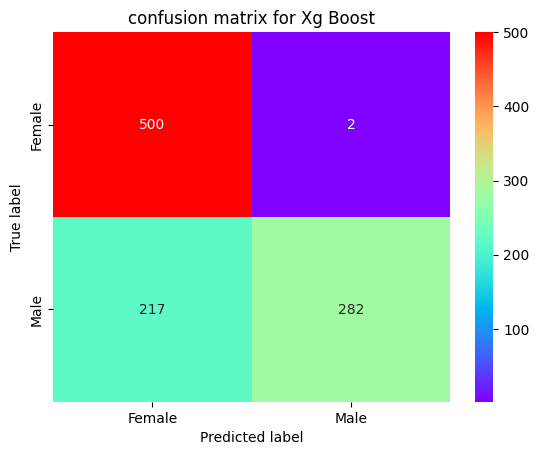

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="rainbow",xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("confusion matrix for Xg Boost")
plt.xlabel("Predicted label")
plt.ylabel("True label")